## **RESOLUCIÓN EVALUACIÓN MÓDULO 2:**
#### **ANÁLISIS DE DATOS**

- Librerías

In [7]:
# Tratamiento de datos
# -----------------------------------------------------------------------
import pandas as pd
import numpy as np

# Libreria Regex para buscar patrones
import re

# Imputación de nulos usando métodos avanzados estadísticos
# -----------------------------------------------------------------------
from sklearn.impute import SimpleImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.impute import KNNImputer

# Librerías de visualización
# -----------------------------------------------------------------------
#import seaborn as sns
#import matplotlib.pyplot as plt
# Configuración
# -----------------------------------------------------------------------
pd.set_option('display.max_columns', None) # para poder visualizar todas las columnas de los DataFrames
pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth', None)

#### **Fase 1: Exploración y Limpieza**

**2. Limpieza de Datos:**

• Elimina o trata los valores nulos, si los hay, en las columnas clave para
asegurar que los datos estén completos.

• Verifica la consistencia y corrección de los datos para asegurarte de que
los datos se presenten de forma coherente.

• Realiza cualquier ajuste o conversión necesaria en las columnas (por
ejemplo, cambiar tipos de datos) para garantizar la adecuación de los
datos para el análisis estadístico.

In [8]:
df_aerolinea = pd.read_csv("aerolinea.csv", index_col = None)

- Creación copias de los Dataframes para trabajar con seguridad

In [9]:
df_aerolinea_copy = df_aerolinea.copy()
df_aerolinea_copy.head()

,Loyalty Number,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed,Country,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month
0,100018,2017,1,3,0,3,1521,152.0,0,0,Canada,Alberta,Edmonton,T9G 1W3,Female,Bachelor,92552.0,Married,Aurora,7919.2,Standard,2016,8,NaN,NaN
1,100018,2017,2,2,2,4,1320,132.0,0,0,Canada,Alberta,Edmonton,T9G 1W3,Female,Bachelor,92552.0,Married,Aurora,7919.2,Standard,2016,8,NaN,NaN
2,100018,2018,10,6,4,10,3110,311.0,385,31,Canada,Alberta,Edmonton,T9G 1W3,Female,Bachelor,92552.0,Married,Aurora,7919.2,Standard,2016,8,NaN,NaN
3,100018,2017,4,4,0,4,924,92.0,0,0,Canada,Alberta,Edmonton,T9G 1W3,Female,Bachelor,92552.0,Married,Aurora,7919.2,Standard,2016,8,NaN,NaN
4,100018,2017,5,0,0,0,0,0.0,0,0,Canada,Alberta,Edmonton,T9G 1W3,Female,Bachelor,92552.0,Married,Aurora,7919.2,Standard,2016,8,NaN,NaN


- **Variables Categóricas**

In [10]:
# Cargar el Dataframe con las variables de tipo categóricas

df_aerolinea_copy[["Country", "Province", "City", "Postal Code", "Gender", "Education", "Marital Status", "Loyalty Card", "Enrollment Type"]].sample(10)

,Country,Province,City,Postal Code,Gender,Education,Marital Status,Loyalty Card,Enrollment Type
110328,Canada,British Columbia,Vancouver,V6E 3D9,Male,High School or Below,Married,Nova,2018 Promotion
360143,Canada,Yukon,Whitehorse,Y2K 6R0,Female,College,Single,Star,Standard
385609,Canada,Yukon,Whitehorse,Y2K 6R0,Female,Bachelor,Married,Nova,2018 Promotion
239443,Canada,Quebec,Tremblant,H5Y 2S9,Male,Bachelor,Married,Star,Standard
198286,Canada,New Brunswick,Fredericton,E3B 2H2,Male,Bachelor,Married,Nova,Standard
221179,Canada,Quebec,Tremblant,H5Y 2S9,Male,College,Single,Nova,Standard
342504,Canada,Manitoba,Winnipeg,R2C 0M5,Female,College,Single,Aurora,Standard
62026,Canada,Alberta,Banff,T4V 1D4,Female,Bachelor,Single,Nova,Standard
356295,Canada,Ontario,Sudbury,M5V 1G5,Female,College,Single,Star,Standard
222392,Canada,Ontario,Toronto,M8Y 4K8,Male,Bachelor,Married,Aurora,Standard


In [11]:
# Columnas categóricas con valores únicos por cada columna

col_cat_unique = ["Country", "Province", "City", "Postal Code", "Gender", "Education", "Marital Status", "Loyalty Card", "Enrollment Type"]

for columna in col_cat_unique:
    print(f"Los valores únicos de la columna '{columna}':\n")
    valores_unicos = df_aerolinea_copy[columna].unique()
    print(valores_unicos)
    print("______________________\n")

Los valores únicos de la columna 'Country':

['Canada']
______________________

Los valores únicos de la columna 'Province':

['Alberta' 'Ontario' 'British Columbia' 'Saskatchewan' 'Quebec'
 'Newfoundland' 'Manitoba' 'New Brunswick' 'Nova Scotia'
 'Prince Edward Island' 'Yukon']
______________________

Los valores únicos de la columna 'City':

['Edmonton' 'Toronto' 'Dawson Creek' 'Vancouver' 'Regina' 'Montreal'
 'Sudbury' 'Quebec City' 'Peace River' "St. John's" 'Tremblant' 'Ottawa'
 'Trenton' 'Winnipeg' 'Thunder Bay' 'West Vancouver' 'Fredericton'
 'London' 'Halifax' 'Moncton' 'Banff' 'Kingston' 'Whistler'
 'Charlottetown' 'Hull' 'Victoria' 'Calgary' 'Kelowna' 'Whitehorse']
______________________

Los valores únicos de la columna 'Postal Code':

['T9G 1W3' 'M1R 4K3' 'U5I 4F1' 'V5R 1W3' 'P1L 8X8' 'P1J 8T7' 'S6J 3G0'
 'H2T 9K8' 'V6E 3D9' 'M5V 1G5' 'H2Y 4R4' 'M8Y 4K8' 'V6E 3Z3' 'G1B 3L5'
 'T9O 2W2' 'A1C 6H9' 'H5Y 2S9' 'K1F 2R2' 'K8V 4B2' 'R3R 3T4' 'P1W 1K4'
 'K8T 5M5' 'V6V 8Z3' 'M2M 7K8'

- **Variables Numéricas**

In [13]:
# Cargar el Dataframe con las variables de tipo numéricas tipo "int"

df_aerolinea_copy[["Loyalty Number", "Year", "Month", "Flights Booked", "Flights with Companions", "Total Flights", "Distance", "Points Redeemed", "Dollar Cost Points Redeemed", "Enrollment Year", "Enrollment Month"]].sample(10)

,Loyalty Number,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Redeemed,Dollar Cost Points Redeemed,Enrollment Year,Enrollment Month
33397,181140,2018,5,8,6,14,2618,528,43,2018,3
77576,286989,2017,9,7,0,7,1925,0,0,2014,11
120483,390911,2017,5,9,0,9,1683,0,0,2016,12
345508,957901,2017,5,0,0,0,0,0,0,2017,11
181194,540905,2018,7,0,0,0,0,0,0,2015,12
260058,737602,2018,7,0,0,0,0,0,0,2018,8
236879,678925,2018,12,0,0,0,0,0,0,2015,11
224135,646137,2018,12,4,4,8,2528,0,0,2012,11
352613,974829,2017,6,0,0,0,0,0,0,2017,10
336133,933807,2018,2,5,0,5,1465,0,0,2017,11


In [14]:
# Columnas numéricas tipo "int" con valores únicos por cada columna

col_num_int = ["Loyalty Number", "Year", "Month", "Flights Booked", "Flights with Companions", "Total Flights", "Distance", "Points Redeemed", "Dollar Cost Points Redeemed", "Enrollment Year", "Enrollment Month"]

for columna in col_num_int:
    print(f"Los valores únicos de la columna '{columna}':\n")
    valores_unicos = df_aerolinea_copy[columna].unique()
    num_valores_unicos = len(valores_unicos)
    print(f"Cantidad de valores únicos: {num_valores_unicos}\nValores únicos: {valores_unicos}")
    print("______________________\n")

Los valores únicos de la columna 'Loyalty Number':

Cantidad de valores únicos: 16737
Valores únicos: [100018 100102 100140 ... 999731 999788 999891]
______________________

Los valores únicos de la columna 'Year':

Cantidad de valores únicos: 2
Valores únicos: [2017 2018]
______________________

Los valores únicos de la columna 'Month':

Cantidad de valores únicos: 12
Valores únicos: [ 1  2 10  4  5  6  7  9  8 11 12  3]
______________________

Los valores únicos de la columna 'Flights Booked':

Cantidad de valores únicos: 22
Valores únicos: [ 3  2  6  4  0 10  9 13  1 14  7  5 11 17  8 15 12 16 20 18 19 21]
______________________

Los valores únicos de la columna 'Flights with Companions':

Cantidad de valores únicos: 12
Valores únicos: [ 0  2  4  1  5  3  7  6  8  9 10 11]
______________________

Los valores únicos de la columna 'Total Flights':

Cantidad de valores únicos: 33
Valores únicos: [ 3  4 10  0  5 13 15  6 14  1 17  7 16 11 23  9  8 18 19 12 21  2 20 22
 28 26 29 27 25 24

In [15]:
# Cargar el Dataframe con las variables de tipo numéricas tipo "float"

df_aerolinea_copy[["Points Accumulated", "Salary", "CLV", "Cancellation Year", "Cancellation Month"]].sample(10)

,Points Accumulated,Salary,CLV,Cancellation Year,Cancellation Month
99134,344.00,NaN,2294.48,NaN,NaN
21521,422.00,80320.0,4603.98,NaN,NaN
302174,421.25,NaN,19872.26,NaN,NaN
121838,0.00,NaN,3891.58,NaN,NaN
261922,0.00,55642.0,2748.85,2015.0,4.0
321459,0.00,92804.0,7305.94,2016.0,7.0
271410,346.00,NaN,2520.03,NaN,NaN
390643,198.00,64869.0,8641.05,2018.0,10.0
162964,0.00,86254.0,6222.21,NaN,NaN
382140,0.00,65416.0,5827.48,2018.0,12.0


In [16]:
# Columnas numéricas tipo "float" con valores únicos por cada columna

col_num_float = ["Points Accumulated", "Salary", "CLV", "Cancellation Year", "Cancellation Month"]

for columna in col_num_float:
    print(f"Los valores únicos de la columna '{columna}':\n")
    valores_unicos = df_aerolinea_copy[columna].unique()
    num_valores_unicos = len(valores_unicos)
    print(f"Cantidad de valores únicos: {num_valores_unicos}\nValores únicos: {valores_unicos}")
    print("______________________\n")

Los valores únicos de la columna 'Points Accumulated':

Cantidad de valores únicos: 1549
Valores únicos: [152.   132.   311.   ...  18.75 601.   626.  ]
______________________

Los valores únicos de la columna 'Salary':

Cantidad de valores únicos: 5891
Valores únicos: [92552.    nan 63253. ... 23160. 97206. 56345.]
______________________

Los valores únicos de la columna 'CLV':

Cantidad de valores únicos: 7984
Valores únicos: [7919.2  2887.74 2838.07 ... 6990.69 3151.16 8409.07]
______________________

Los valores únicos de la columna 'Cancellation Year':

Cantidad de valores únicos: 7
Valores únicos: [  nan 2018. 2015. 2016. 2014. 2013. 2017.]
______________________

Los valores únicos de la columna 'Cancellation Month':

Cantidad de valores únicos: 13
Valores únicos: [nan  3.  9.  2.  7.  6.  8.  4.  1.  5. 11. 12. 10.]
______________________



- Imputación de valores nulos en variables numéricas y transformación a Tipo de Dato

In [38]:
# Reemplazar los valores:

dic_month = {1: "January", 2: "February", 3: "March", 4: "April", 5: "May", 6: "June", 7: "July", 8: "August", 9: "September", 10: "October", 11: "November", 12: "December"}

def reemplazar_datos(df_aerolinea_copy):
    
    df_aerolinea_copy["Month"] = df_aerolinea_copy["Month"].replace(dic_month)

 
    df_aerolinea_copy["Enrollment Month"] = df_aerolinea_copy["Enrollment Month"].replace(dic_month)

    return df_aerolinea_copy

df_aerolinea_copy = reemplazar_datos(df_aerolinea_copy)

In [39]:
df_aerolinea_copy.head()

,Loyalty Number,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed,Country,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month
0,100018,2017,January,3,0,3,1521,152,0,0,Canada,Alberta,Edmonton,T9G 1W3,Female,Bachelor,92552.0,Married,Aurora,7919.2,Standard,2016,August,2017,7
1,100018,2017,February,2,2,4,1320,132,0,0,Canada,Alberta,Edmonton,T9G 1W3,Female,Bachelor,92552.0,Married,Aurora,7919.2,Standard,2016,August,2017,7
2,100018,2018,October,6,4,10,3110,311,385,31,Canada,Alberta,Edmonton,T9G 1W3,Female,Bachelor,92552.0,Married,Aurora,7919.2,Standard,2016,August,2017,7
3,100018,2017,April,4,0,4,924,92,0,0,Canada,Alberta,Edmonton,T9G 1W3,Female,Bachelor,92552.0,Married,Aurora,7919.2,Standard,2016,August,2017,7
4,100018,2017,May,0,0,0,0,0,0,0,Canada,Alberta,Edmonton,T9G 1W3,Female,Bachelor,92552.0,Married,Aurora,7919.2,Standard,2016,August,2017,7


In [17]:
# Porcentaje de nulos en las variables numéricas "Cancellation Year", "Cancellation Month" y "Salary"

variables_float_nulos = ["Cancellation Year", "Cancellation Month", "Salary"]

variables_float= pd.DataFrame((df_aerolinea_copy[variables_float_nulos].isnull().sum() / df_aerolinea_copy[variables_float_nulos].shape[0]), columns = ["Nulos"])
variables_float

,Nulos
Cancellation Year,0.876575
Cancellation Month,0.876575
Salary,0.253121


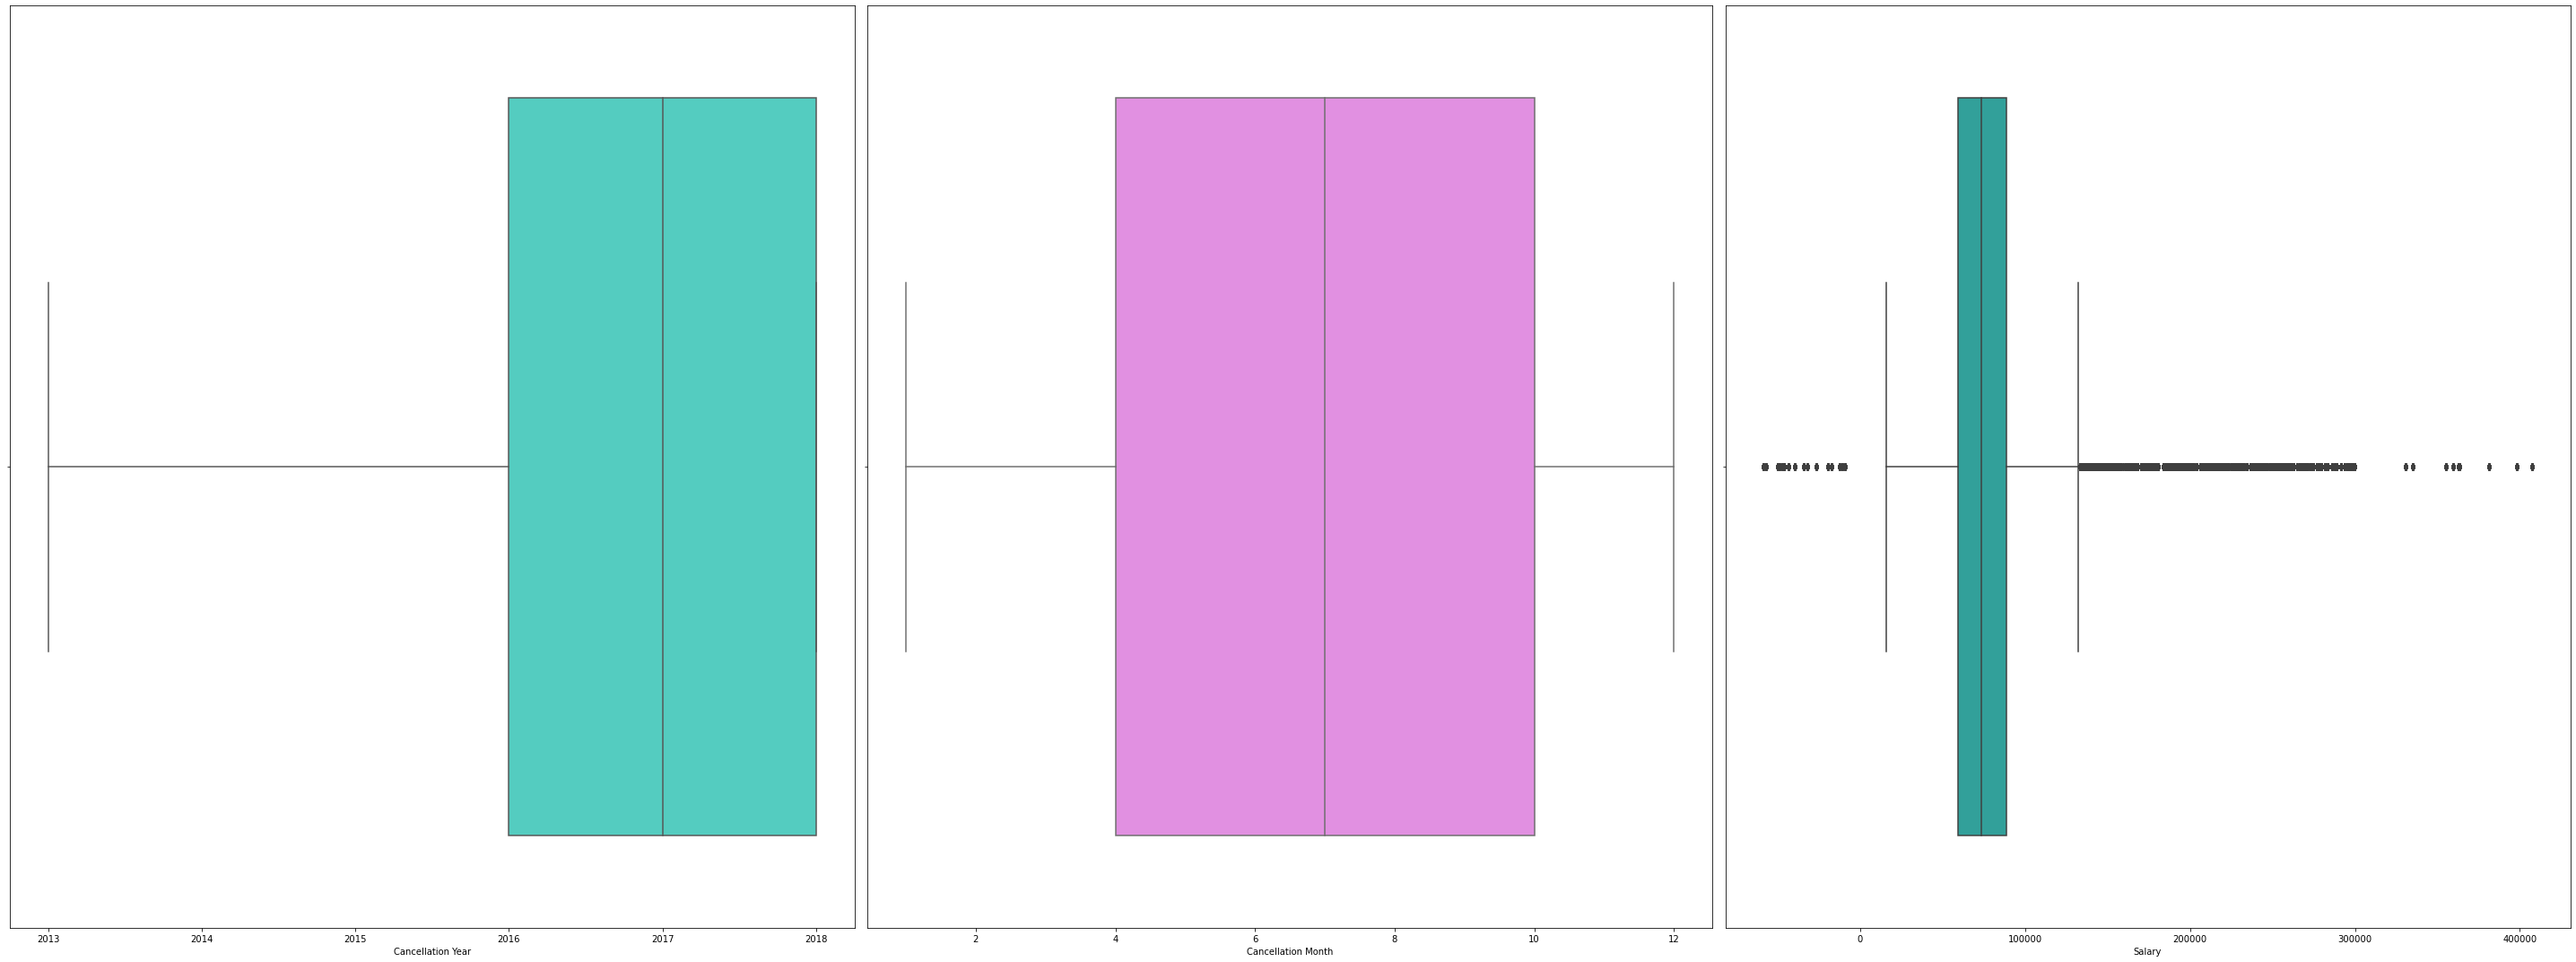

In [49]:
# Presencia de Valores Atípicos en las variables numéricas "Cancellation Year", "Cancellation Month" y "Salary"

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(40, 15)) 

axes = axes.flat
colores = ["turquoise", "violet", "lightseagreen"]

for indice, col in enumerate(variables_float_nulos):
    sns.boxplot(x=col, data=df_aerolinea_copy, ax=axes[indice], color=colores[indice])

plt.tight_layout()
plt.show() 

In [18]:
# Decidir cuál es el método más apropiado para imputar los nulos

df_aerolinea_copy["Cancellation Year"].describe()[["mean", "50%"]]

mean    2016.499521
50%     2017.000000
Name: Cancellation Year, dtype: float64

In [19]:
# Decidir cuál es el método más apropiado para imputar los nulos

df_aerolinea_copy["Cancellation Month"].describe()[["mean", "50%"]]

mean    6.966443
50%     7.000000
Name: Cancellation Month, dtype: float64

- **"Cancellation Year"** --> 87 % valores nulos y no outliers--> SimpleImputer (Mediana) Valor de los datos no asimétrica (sesgada) 

- **"Cancellation Month"** --> 87 % valores nulos y no outliers --> SimpleImputer (Mediana) Valor de los datos no asimétrica (sesgada) 

- **"Salary"** --> 25 % valores nulos y muchos outliers --> IterativeImputer. Robusto frente valores de datos sesgados y extremos

In [20]:
# Imputación de nulos y cambiar tipo de dato --> de float a int de "Cancellation Year" y "Cancellation Month"


def imputacion_nulos(df_aerolinea_copy, columna):
    mediana = df_aerolinea_copy[columna].median()
    df_aerolinea_copy[columna] = df_aerolinea_copy[columna].fillna(mediana)

    return mediana

imputacion_nulos(df_aerolinea_copy, "Cancellation Year")
imputacion_nulos(df_aerolinea_copy, "Cancellation Month")

df_aerolinea_copy["Cancellation Year"] = df_aerolinea_copy["Cancellation Year"].astype(int)
df_aerolinea_copy["Cancellation Month"] = df_aerolinea_copy["Cancellation Month"].astype(int)

In [65]:
print(f"Utilizando 'SimpleImputer': {df_aerolinea_copy[['Cancellation Year']].isnull().sum()} nulos")
print(f"Utilizando 'SimpleImputer': {df_aerolinea_copy[['Cancellation Month']].isnull().sum()} nulos")

Utilizando 'SimpleImputer': Cancellation Year    0
dtype: int64 nulos
Utilizando 'SimpleImputer': Cancellation Month    0
dtype: int64 nulos


In [21]:
# Imputación de nulos de "Salary"

imputacion_iterative = IterativeImputer(max_iter = 20, random_state = 42)

salary_imputado = imputacion_iterative.fit_transform(df_aerolinea_copy[["Salary"]])

df_aerolinea_copy["Salary"] = salary_imputado.round(2)

In [22]:
print(f"Utilizando 'IterativeImputer': {df_aerolinea_copy[['Salary']].isnull().sum()} nulos")

Utilizando 'IterativeImputer': Salary    0
dtype: int64 nulos


In [23]:
# Transformación de "float" a "int" --> "Points Accumulated"

df_aerolinea_copy["Points Accumulated"]=df_aerolinea_copy["Points Accumulated"].astype(int)
df_aerolinea_copy["Points Accumulated"].dtypes

dtype('int64')

In [24]:
df_aerolinea_copy["Points Accumulated"].head().reset_index()

,index,Points Accumulated
0,0,152
1,1,132
2,2,311
3,3,92
4,4,0


In [28]:
df_aerolinea_copy.sample(10)

,Loyalty Number,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed,Country,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month
343181,952077,2017,6,18,4,22,1562,156,0,0,Canada,Alberta,Edmonton,T3G 6Y6,Male,College,79268.83,Single,Nova,11537.51,Standard,2013,2,2017,7
344873,956144,2017,8,10,3,13,1768,176,655,53,Canada,Quebec,Montreal,H2Y 2W2,Male,Bachelor,102702.00,Married,Nova,7725.54,Standard,2014,4,2017,7
314175,875657,2017,8,7,3,10,2610,261,777,63,Canada,New Brunswick,Moncton,E1A 2A7,Male,High School or Below,59906.00,Married,Nova,3534.34,Standard,2014,8,2017,7
325621,906316,2018,11,5,5,10,2520,252,515,42,Canada,Alberta,Edmonton,T3G 6Y6,Male,Bachelor,54363.00,Married,Star,6481.53,Standard,2016,2,2017,7
87379,311907,2018,8,15,0,15,2355,235,0,0,Canada,Nova Scotia,Halifax,B3J 9S2,Female,Bachelor,78832.00,Single,Aurora,8343.75,Standard,2014,4,2017,7
171273,514493,2017,10,0,0,0,0,0,0,0,Canada,Quebec,Montreal,H2Y 2W2,Male,Master,92439.00,Married,Star,2174.11,Standard,2018,11,2017,7
260716,738652,2017,8,1,1,2,3582,358,542,44,Canada,New Brunswick,Fredericton,E3B 2H2,Female,Bachelor,62551.00,Married,Nova,5619.65,Standard,2016,10,2017,7
205772,602213,2018,6,12,4,16,1648,164,654,53,Canada,Ontario,Toronto,P1W 1K4,Female,Bachelor,68792.00,Married,Star,18380.39,Standard,2015,3,2017,7
47334,212762,2017,7,0,0,0,0,0,0,0,Canada,Newfoundland,St. John's,A1C 6H9,Female,College,79268.83,Married,Star,7292.40,Standard,2013,2,2017,7
303441,846718,2017,10,0,0,0,0,0,0,0,Canada,Nova Scotia,Halifax,B3C 2M8,Male,Bachelor,48590.00,Married,Star,15042.58,Standard,2013,3,2015,6


In [37]:
df_aerolinea_copy.to_csv("aerolinea_limpio.csv", index= False)